**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

Q1.1
I cleaned the Price column by removing dollar signs and commas, then coerced values to numeric. This was able to convert the column from object to float64. After there were 0 missing values.

In [106]:
import re, numpy as np, pandas as pd
import matplotlib.pyplot as plt

PATH_AIRBNB = "./data/airbnb_hw.csv"
air = pd.read_csv(PATH_AIRBNB)
print("shape:", air.shape, "\n")        # rows & cols
print("columns:", air.columns.tolist()) # names
print("dtype of Price:", air["Price"].dtype)

#remove formatting chars
air["Price"] = air["Price"].str.replace("$","",regex=False)
air["Price"] = air["Price"].str.replace(",","",regex=False)

air["Price"] = pd.to_numeric(air["Price"], errors="coerce") #convert 

# Check the cleaned Price column
print("Missing values:", air["Price"].isna().sum())


shape: (30478, 13) 

columns: ['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type', 'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds', 'Number of Records', 'Number Of Reviews', 'Price', 'Review Scores Rating']
dtype of Price: object
Missing values: 0


Q1.2
 A missing proportion of around 0.76 is high and suggests data may be incomplete or inconsistently collected which does raise a concern. Certain force types such as chemical irritants and maximal restraint techniques show a high proportion of unknown injury status, suggesting potential inconsistencies in reporting across force types


In [118]:
import pandas as pd

# Load the data
PATH_MN = "./data/mn_police_use_of_force.csv"
mn = pd.read_csv(PATH_MN)
print("Shape:", mn.shape)
print("Unique values in subject_injury:", mn["subject_injury"].unique())

#Calculate missing value proportion
total_nan = mn["subject_injury"].isna().sum()
total_count = len(mn)
prop_missing = total_nan / total_count
print("Proportion of missing values:", prop_missing)

mn["subject_injury_clean"] = mn["subject_injury"].fillna("Unknown")

#
crosstab = pd.crosstab(mn["subject_injury_clean"], mn["force_type"])
print("Cross-tabulation:\n", crosstab)



Shape: (12925, 13)
Unique values in subject_injury: [nan 'No' 'Yes']
Proportion of missing values: 0.7619342359767892

Cross-tabulation:
 force_type            Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury_clean                                                    
No                        0          1093                131        2   
Unknown                   2          7051               1421        0   
Yes                       2          1286                 41        0   

force_type            Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury_clean                                                      
No                                   33                 34            0   
Unknown                              27                 74           87   
Yes                                  44                 40            0   

force_type            Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury_clean                       

Q1.3

In [119]:
# load parquet
df = pd.read_parquet("./data/justice_data.parquet")

print("shape:", df.shape)
print("Unique values:", df["WhetherDefendantWasReleasedPretrial"].unique())

print("Value counts before cleaning:\n", df["WhetherDefendantWasReleasedPretrial"].value_counts(dropna=False))

# Clean dummy variable
df["released_clean"] = df["WhetherDefendantWasReleasedPretrial"].replace(9, np.nan)

# Check counts
print("\nUnique values after cleaning:", df["released_clean"].unique())
print(df["released_clean"].value_counts(dropna=False))
print("Missing values:", df["released_clean"].isna().sum())



shape: (22986, 709)
Unique values: [9 0 1]
Value counts before cleaning:
 WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64

Unique values after cleaning: [nan  0.  1.]
released_clean
1.0    19154
0.0     3801
NaN       31
Name: count, dtype: int64
Missing values: 31


Q1.4
I checked the data type of ImposedSentenceAllChargeInContactEvent and saw it was an object, with some invalid entries like blank strings. I converted it to numeric using pd.to_numeric, which turned those into NaN.
About 39% of the values were missing. I cross-tabulated the missing values with SentenceTypeAllChargesAtConvictionInContactEvent and found that all missing cases had sentence types that id 4 or 9 showing rhey were not random

In [126]:
import pandas as pd
import numpy as np

PATH_PRETRIAL = "./data/justice_data.parquet"
pretrial = pd.read_parquet(PATH_PRETRIAL)

print("Data type:", pretrial["ImposedSentenceAllChargeInContactEvent"].dtype) 

# print("Unique values:", pretrial["ImposedSentenceAllChargeInContactEvent"].unique())

pretrial["sentence"] = pd.to_numeric(
    pretrial["ImposedSentenceAllChargeInContactEvent"], errors="coerce")

pretrial["sentence_missing"] = pretrial["sentence"].isnull()

#missing amount 
missing_count = pretrial["sentence_missing"].sum()
total_count = len(pretrial)
missing_prop = missing_count / total_count

print(missing_prop)

#Crossabulate
crosstab = pd.crosstab(
    pretrial["sentence_missing"],
    pretrial["SentenceTypeAllChargesAtConvictionInContactEvent"]
)

print(crosstab)

Data type: object
0.3938484294788132
SentenceTypeAllChargesAtConvictionInContactEvent     0     1    2     4    9
sentence_missing                                                            
False                                             8720  4299  914     0    0
True                                                 0     0    0  8779  274


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

Q2.3
i cleaned the Year variable by converting it to numeric and filtering out invalid entries. The range I then saw was from Year range: 0.0 to 2026.0. I then filtered the dataset to include only attacks from 1940 and saw that the number of attacks have increased.

In [145]:
import pandas as pd
import numpy as np

#1
path_shark= "./data/GSAF5.xls"
sharks = pd.read_excel(path_shark)

print(sharks.shape)
print(sharks.columns)

# 2 calcuate missing values
print("\nMissing values per column:")
print(sharks.isna().sum()) 

#drop columns
sharks = sharks.drop(columns=[ 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22']) 
print("\nShape after:", sharks.shape)

print(sharks.shape)


#3
sharks['Year'] = pd.to_numeric(sharks['Year'], errors='coerce') #convert
print("Year range:", sharks['Year'].min(), "to", sharks['Year'].max()) #range

sharks_after1940 = sharks[sharks['Year'] >= 1940] #filter

attacks_per_year = sharks_after1940['Year'].value_counts().sort_index()
print(attacks_per_year)




(7042, 23)
Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

Missing values per column:
Date                 0
Year                 2
Type                18
Country             50
State              485
Location           567
Activity           585
Name               219
Sex                579
Age               2994
Injury              35
Fatal Y/N          561
Time              3526
Species           3131
Source              20
pdf                243
href formula       248
href               246
Case Number        244
Case Number.1      245
original order     243
Unnamed: 21       7041
Unnamed: 22       7040
dtype: int64

Shape after: (7042, 15)
(7042, 15)
Year range: 0.0 to 2026.0
Year
1940.0     24
1941.0     27
1942.0     41
1943.

[nan 63.  9. 39. 19.  7. 85. 69. 18. 66. 21. 40. 37. 16. 20. 12. 42. 26.
 14. 45. 30. 56. 29. 35. 58. 24. 55. 17. 36. 23. 28. 48. 57. 61. 27. 38.
 68. 33. 15. 41. 43. 49. 25. 46. 65. 64. 13. 11. 32. 10. 62. 22. 52. 44.
 47. 59.  8. 50. 34. 77. 60. 73. 67.  6. 53. 51. 31. 71. 54. 75. 70.  4.
 74.  3. 82. 72.  5. 86. 84. 87.  1. 81. 78.]
Missing values: 3139


<Axes: >

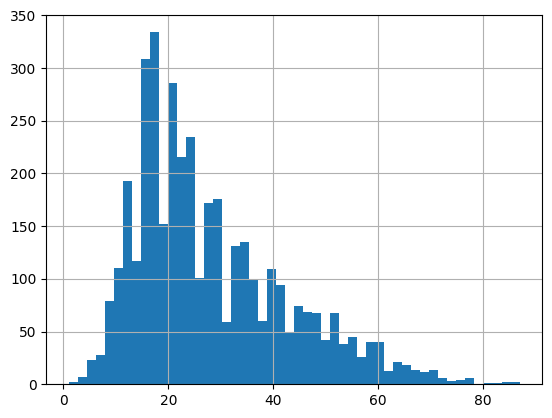

In [136]:
#4
print(sharks['Age'].unique())
# Clean the Age column

sharks['Age'] = pd.to_numeric(sharks['Age'], errors='coerce')

sharks['age_nan'] = sharks['Age'].isna()
print("Missing values:", sharks['age_nan'].sum())

sharks['Age'].hist(bins=50)

In [131]:
#5
print("Unique Sex values:", sharks['Sex'].unique())
sharks['Sex_clean'] = sharks['Sex'].str.strip().str.upper()

# Fixiing cases
sharks['Sex_clean'] = sharks['Sex_clean'].replace({
    'M X 2': 'M',   # treat as male 
    'N': np.nan,    #unclear
    '.': np.nan,    # unclear
    'LLI': np.nan   # unclear 
})

print("Unique Sex values:", sharks['Sex_clean'].unique())


num_males = (sharks['Sex_clean'] == 'M').sum()
num_females = (sharks['Sex_clean'] == 'F').sum()
num_missing = sharks['Sex_clean'].isna().sum()


total_valid = num_males + num_females

prop_males = num_males / total_valid

print(prop_males)




Unique Sex values: ['M' 'F' 'F ' 'M ' nan ' M' 'm' 'lli' 'M x 2' 'N' '.']
Unique Sex values: ['M' 'F' nan]
0.8752128812509676


In [97]:
#6

# print("Unique Type values:", sharks['Type'].unique())

#strip 
sharks['Type_clean'] = sharks['Type'].str.strip().str.capitalize()
# print("Cleaned Type values:", sharks['Type_clean'].unique())

#convert to unknown 
sharks['Type_clean'] = sharks['Type_clean'].replace({
    'Provoked': 'Provoked',
    'Unprovoked': 'Unprovoked',
    'Questionable': 'Unknown',
    'Watercraft': 'Unknown',
    'Sea disaster': 'Unknown',
    '?': 'Unknown',
    'Unconfirmed': 'Unknown',
    'Unverified': 'Unknown',
    'Invalid': 'Unknown',
    'Under investigation': 'Unknown',
    'Boat': 'Unknown',
    np.nan: 'Unknown'
})


#proportion 
num_unprovoked =(sharks['Type_clean']== 'Unprovoked').sum()
total =len(sharks)
prop_unprovoked =num_unprovoked / total

print("\nProportion unprovoked:", prop_unprovoked)




Proportion unprovoked: 0.7380005680204488


In [132]:
#7
# print("Unique Fatal values (before):", sharks['Fatal Y/N'].unique())

# Step 1: strip spaces + uppercase for consistency
sharks['Fatal_clean'] = sharks['Fatal Y/N'].str.strip().str.upper()

sharks['Fatal_clean'] = sharks['Fatal_clean'].replace({
    'Y': 'Y',
    'Y X 2': 'Y',    # double count but still fatal
    'N': 'N',
    'NQ': 'Unknown', # weird code
    'UNKNOWN': 'Unknown',
    'F': 'Unknown',  # not a valid category here
    'M': 'Unknown',  # mis-coded
    '2017': 'Unknown',
    'NAN': 'Unknown'
})

print("Unique Fatal values (after):", sharks['Fatal_clean'].unique())


Unique Fatal values (after): ['N' 'Y' 'Unknown' nan]


2.8
1. More likely to launch unprovoked attacks on men.
2. Unprovoked attacks are much more likely to be fatal than provoked ones
3. Shark attacks are more likely to be fatal when the victim is male.
4. I love sharks!!!


In [94]:
ct_sex_type = pd.crosstab(sharks['Sex_clean'], sharks['Type_clean'])
print("Sex vs. Attack Type")
print(ct_sex_type)

#


Sex vs. Attack Type
Type_clean  Provoked  Unknown  Unprovoked
Sex_clean                                
F                 31       92         683
M                550      758        4345


In [95]:
ct_fatal_type = pd.crosstab(sharks['Fatal_clean'], sharks['Type_clean'])
print("Fatal vs. Attack Type")
print(ct_fatal_type)

Fatal vs. Attack Type
Type_clean   Provoked  Unknown  Unprovoked
Fatal_clean                               
N                 611      449        3857
Unknown             4       14          62
Y                  21      201        1261


In [96]:
ct_fatal_sex = pd.crosstab(sharks['Fatal_clean'], sharks['Sex_clean'])
print("Fatal vs. Sex")
print(ct_fatal_sex)

Fatal vs. Sex
Sex_clean      F     M
Fatal_clean           
N            614  3941
Unknown        5    44
Y            122  1252


In [142]:
print("Unique Species examples:", sharks['Species '].dropna().unique()[:30])# Convert to lowercase text, fill missing with ''
sharks['Species_clean'] = sharks['Species '].astype(str).str.lower()

# Check if 'white' appears in the species description
sharks['white_shark'] = sharks['Species_clean'].str.contains('white')

# Proportion of attacks involving white sharks
prop_white = sharks['white_shark'].mean()

print(prop_white)



Unique Species examples: ['Lemon shark 1.8 m (6ft)' '5m (16.5ft) Great White' 'Undetermined'
 'Suspected Great White' 'Great White Shark est 3m (10ft)' 'Lemon shark'
 '5ft (1.5m) Bull shark' 'Unknown' 'Undetermined small shall shark'
 'Undetermined ' '2m Bull shark?' 'Sand Tiger shark' 'Small shark'
 'Not stated' 'Bull shark' 'Great White' 'Small shark 1m (3ft) long'
 'Dusky sharks' 'Not Staed' '1.5m Tiger shark' 'Great White Shark'
 'Not stated ' 'Mako shark' 'bull shark' '1.8m (6ft) bull shark'
 'Bronze whaler' 'Described as a large terrifying animal'
 'Reportedly Tiger or Bull shark' 'Great White Shart estimated 4.8m 16 ft'
 'Reportedly a Tiger Shark']
0.10678784436239705
